Following the tutorial from matplotlib website: 

https://matplotlib.org/tutorials/introductory/pyplot.html


# Intro to pyplot

matplotlib.pyplot makes plotting commands like MATLAB.
- current figure/plotting area/plotting functions are preserved after a call.
- axes refers to part of figure - not mathmatical y or x.

Provided only one array will plot as y, with integer index on x.

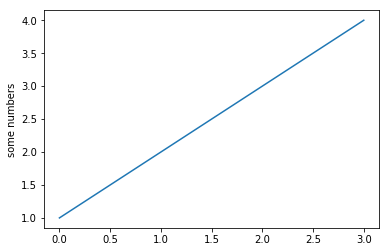

In [5]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

Otherwise if two arrays given: taken as x and y.

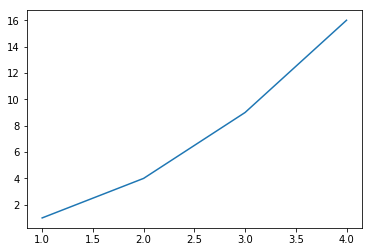

In [7]:
plt.plot([1,2,3,4],[1,4,9,16])

## Formatting style of plot

- format string is optional 3rd argument of plot()

Complete list of settings here:
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

[0, 6, 0, 20]

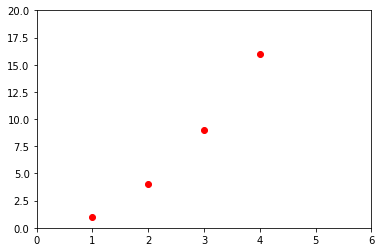

In [10]:
plt.plot([1,2,3,4],[1,4,9,16],'ro')
plt.axis([0,6,0,20]) # [xmin, xmax, ymin, ymax]

Doesnt just take sequences, numpy arrays taken also. 

All sequences given are converted to numpy arrays internally.

Can provide a number of inputs in one .plot() method call: 

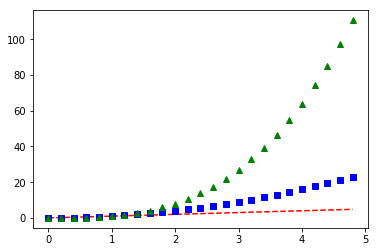

In [17]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5.0, 0.2)

plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show() # gets rid of plot text output.

## Plotting wiht keyword strings

There are some instances where you have data that can be called using strings. e.g. np.recarray, pd.DataFrame.

here we use the _data_ argument.

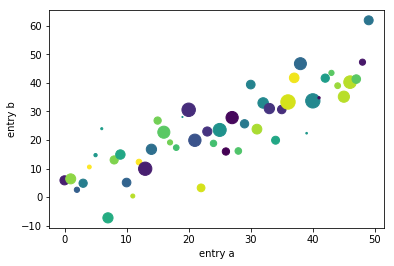

In [33]:
data = {
    'a': np.arange(50),
    'c': np.random.randint(0,50,50),
    'd': np.random.randn(50),
       }

data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data= data)
plt.xlabel('entry a')
plt.ylabel('entry b')

## Plotting with catagorical vars

We can pass cat vars to matplotlib.

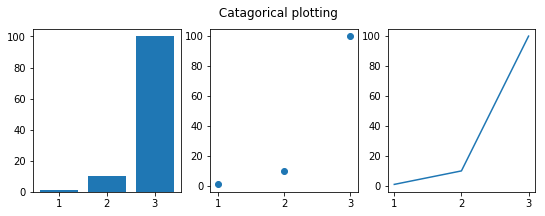

In [46]:
names = ['group_a','group_b','group_c']
names = [1,2,3]
values = [1, 10, 100]

plt.figure(1, figsize=(9,3))

plt.subplot(131)
plt.bar(names,values)
plt.subplot(132)
plt.scatter(names,values)
plt.subplot(133)
plt.plot(names,values)
plt.suptitle(' Catagorical plotting')
plt.show()

!NOTE Using strings as catagory names doesnt appear to work anymore:

names = ['group_a','group_b','group_c']
######## names = [1,2,3]
values = [1, 10, 100]

plt.figure(1, figsize=(9,3))

plt.subplot(131)
plt.bar(names,values)
plt.subplot(132)
plt.scatter(names,values)
plt.subplot(133)
plt.plot(names,values)
plt.suptitle(' Catagorical plotting')
plt.show()

## Controlling line properties

You can set lots of line properties: linewidth, dash style, antialiased etc.

https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

```python 
plt.plot(x, y, linewidth=2)
```

```python
lines = plt.plot(x1, y1, x2, y2)
# use keyword args
plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)
```

 Get a list of what can be set by calling ```setp()``` function.

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  antialiased or aa: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: string or anything printable with '%s' conversion. 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash

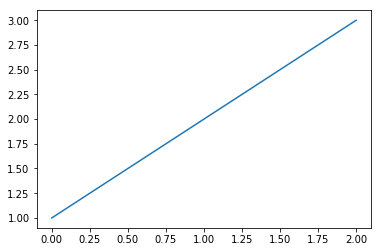

In [53]:
lines = plt.plot([1,2,3])

plt.setp(lines)

## Working with multiple figures and axes

Current figure, current axis are things...all aplotting commands apply to curret axes.

```gca()``` returns the current figure.

```gcf()``` returns current figure.

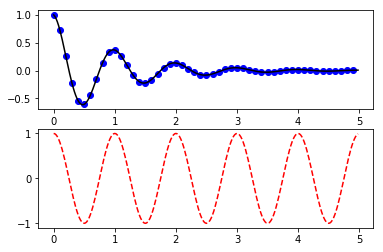

In [71]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0,5,0.1)
t2 = np.arange(0,5, 0.02)


plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

Lots of suplots examples here:
https://matplotlib.org/gallery/subplots_axes_and_figures/subplot_demo.html

Examples of positioning own axes (i.e. not on a square grid) here:
https://matplotlib.org/gallery/subplots_axes_and_figures/axes_demo.html

clear current figure with ```clf()```

clear current axis ```cla()```.



Memory is not complelety clear until you explicity close the figure with ```close()``` (deleting all references to figure is not enough). 

## Working with text

can add text to abitary location with ```text()```

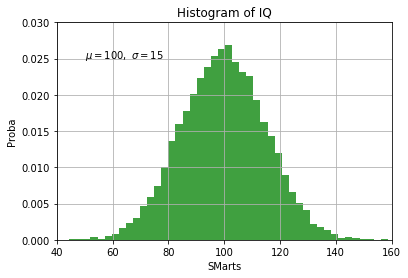

In [84]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# make histogram
n, bins, patches = plt.hist(x, 50, normed=True,  facecolor='g',alpha = 0.75)

plt.xlabel('SMarts')
plt.ylabel('Proba')
plt.title('Histogram of IQ')
plt.text(50, 0.025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160 , 0 ,0.03])
plt.grid(True)
plt.show()


Can specifiy arguments for labels:

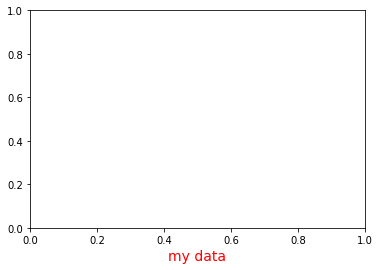

In [93]:
plt.xlabel('my data', fontsize = 14, color='red')

## Using mathmatical expressions in text

matplotlib accepts TeX equations, e.g. for $\sigma_i = 15$

```plt.title(r'$\sigma_i=15$')```

The **r in the string** is **important** as it tells python not to treat the backslashes as escape characters.

More info on writing eqns here:
https://matplotlib.org/tutorials/text/mathtext.html


## Annotating text

As well as writing text can add arrows with text using ```annotate()```

Both palcement arguments for start and end of arrwos are (x,y) tuples.

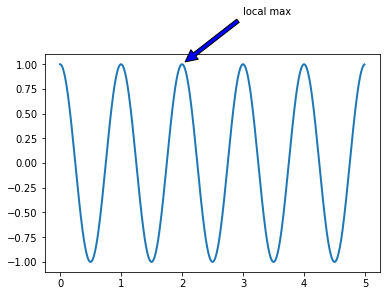

In [106]:
ax = plt.subplot(111)

t = np.arange(0,5,0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t,s, lw=2) # lw= lineweight

plt.annotate('local max', xy=(2,1), xytext=(3,1.5),
            arrowprops=dict(facecolor='b', shrink=0.05)
            )

## Logarithmic and other non-linear axes

Log and logit scales supported. Changing scale is easy:
```plt.xscale('log')```

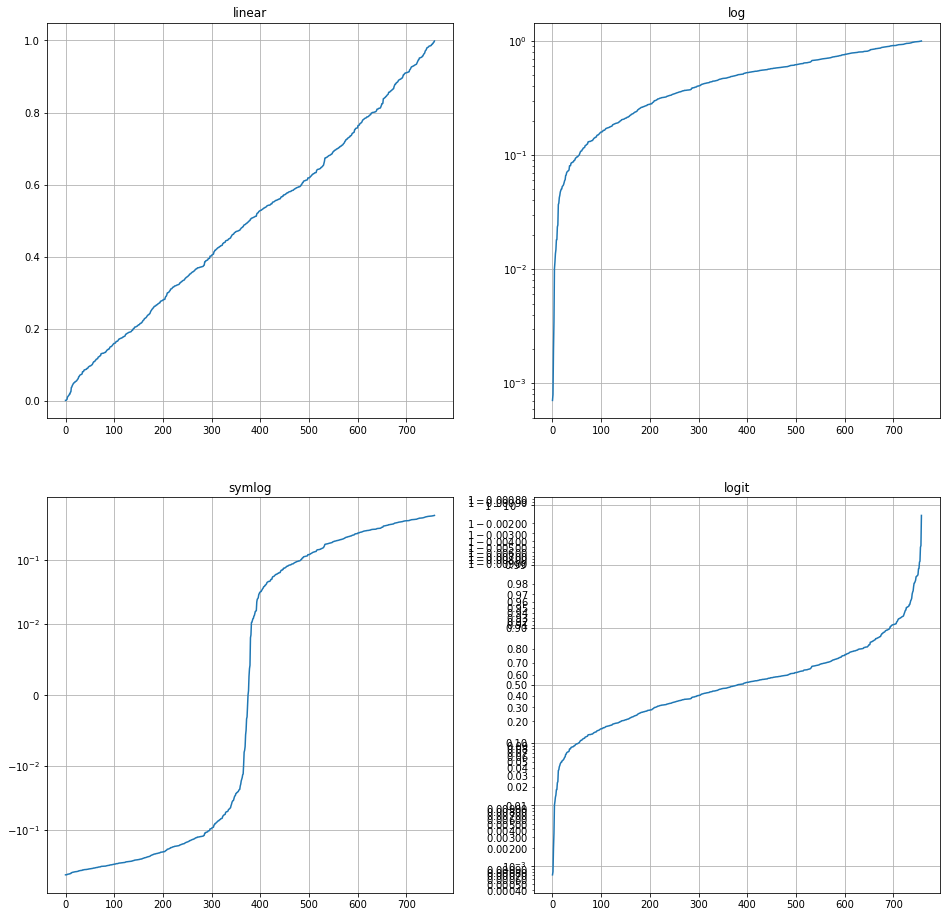

In [120]:
from matplotlib.ticker import NullFormatter

# random seed for reproducability

# make up data for interval 0,1
y = np.random.normal(loc=0.5, scale= 0.4, size = 1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1,figsize= (16,16))

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x,y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x,y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)


# Displaying in Jupyter Notebooks

use magic in notebook to not need to use .show() command:

In [123]:
%matplotlib inline